# Random Forest

__Introduction:__ 

Random forest is an Ensemble over decision tree i.e. it combines different decision tree to make a predictions.

Indepth explanation can be found [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)


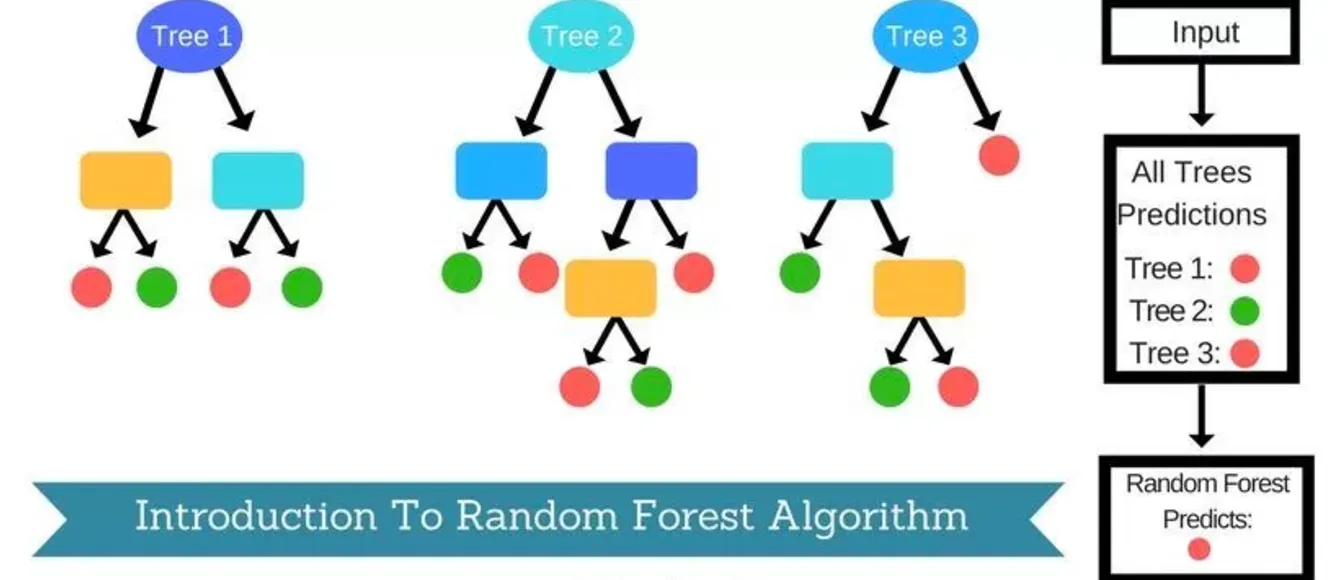

__Steps Involved:__

* N decision trees combined together
* N predictions from N trees
* Result = Average of N predictions

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

## Loading Data

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data['MEDV'] = boston_data.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**A little bit of data exploration**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing

### Checking no. of null values

In [9]:
print(data.isnull().sum())  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Splitting data

In [10]:
x = data.drop(['MEDV'], axis =1)

y = data['MEDV']

In [11]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [14]:
# Splitting data to training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=101)

# print the shapes
print("Train Input Shape = {}".format(xtrain.shape))
print("Train Output  Shape = {}".format(ytrain.shape))
print("Test Input Shape = {}".format(xtest.shape))
print("Test Output  Shape = {}".format(ytest.shape))

Train Input Shape = (354, 13)
Train Output  Shape = (354,)
Test Input Shape = (152, 13)
Test Output  Shape = (152,)


# <font color = "green">Random Forest Regression</font>

### Training Model

In [15]:
#we have various parameters, now we will use number of ensembles
rf_regressor = RandomForestRegressor(100) 

#number of ensembles are 100 i.e. we are combining 100 deciosion trees to find out the results 
#train our model
rf_regressor.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Prediction

In [16]:
y_pred  = rf_regressor.predict(xtest)

In [17]:
y_pred

array([47.089, 32.906, 14.579, 15.48 , 29.418, 32.707, 41.223, 14.865,
       36.225,  7.015, 28.631, 14.081, 19.158, 20.65 , 21.34 , 26.316,
        7.308, 32.772, 26.22 , 23.797, 11.652, 21.161, 20.673, 32.497,
       34.275, 20.289, 26.259, 16.569, 39.089, 32.584, 20.886, 20.113,
       40.035, 45.653, 25.204, 21.644, 15.399, 19.639,  8.285, 30.735,
       21.853, 21.828, 40.836, 11.325, 20.2  , 22.712, 28.532, 14.934,
       26.577, 30.237, 34.157, 41.856, 20.495, 24.496, 34.1  , 11.39 ,
       18.666, 17.717, 21.112, 19.359, 34.76 , 11.864, 26.817, 22.154,
        9.646, 24.147, 22.569, 19.635, 11.932, 19.946, 21.064, 23.138,
       17.726, 20.114, 23.795, 18.142, 45.029, 19.46 , 30.347, 11.306,
       16.597, 20.469, 24.747, 14.242, 18.864, 21.685, 20.676, 27.661,
       20.578, 21.209, 11.522, 13.529, 26.276, 29.138,  6.94 , 40.086,
       13.577, 32.804,  9.678, 20.572, 34.322, 20.232, 23.49 , 23.378,
       20.919, 22.394, 23.646, 33.7  , 40.878, 32.29 , 20.899, 41.02 ,
      

### Error

In [18]:
# mean squared error
error = mean_squared_error(y_pred, ytest)    
print ("Error : ", error)

Error :  13.612425888157894


this model has error rate of 13% it means how well this model is performing.
we have used ensemble of decisions.